In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [6]:
menstrual_data_path = "../Kaggle_Menstrual_Cycle_dataset.csv"
menstrual_df= pd.read_csv(menstrual_data_path)
menstrual_df.head()
print(menstrual_df.shape)

(1665, 80)


In [7]:
# printing out the unique values in each column
# for cols in menstrual_df.columns:
    # print(f"{cols} : \n {menstrual_df[cols].unique()} \n \n")

print(f"{menstrual_df['ClientID'].unique()} \n \n")

['nfp8122' 'nfp8114' 'nfp8109' 'nfp8107' 'nfp8106' 'nfp8024' 'nfp8020'
 'nfp8026' 'nfp8030' 'nfp8031' 'nfp8032' 'nfp8034' 'nfp8036' 'nfp8040'
 'nfp8041' 'nfp8042' 'nfp8043' 'nfp8045' 'nfp8046' 'nfp8047' 'nfp8049'
 'nfp8050' 'nfp8051' 'nfp8057' 'nfp8058' 'nfp8060' 'nfp8062' 'nfp8063'
 'nfp8064' 'nfp8066' 'nfp8068' 'nfp8069' 'nfp8072' 'nfp8073' 'nfp8074'
 'nfp8076' 'nfp8079' 'nfp8080' 'nfp8083' 'nfp8085' 'nfp8087' 'nfp8091'
 'nfp8094' 'nfp8099' 'nfp8100' 'nfp8101' 'nfp8102' 'nfp8110' 'nfp8113'
 'nfp8116' 'nfp8123' 'nfp8124' 'nfp8129' 'nfp8131' 'nfp8133' 'nfp8137'
 'nfp8140' 'nfp8143' 'nfp8144' 'nfp8149' 'nfp8150' 'nfp8152' 'nfp8154'
 'nfp8155' 'nfp8159' 'nfp8161' 'nfp8164' 'nfp8165' 'nfp8168' 'nfp8172'
 'nfp8173' 'nfp8174' 'nfp8176' 'nfp8177' 'nfp8178' 'nfp8179' 'nfp8184'
 'nfp8186' 'nfp8187' 'nfp8188' 'nfp8189' 'nfp8190' 'nfp8192' 'nfp8193'
 'nfp8195' 'nfp8196' 'nfp8197' 'nfp8200' 'nfp8206' 'nfp8207' 'nfp8209'
 'nfp8210' 'nfp8211' 'nfp8212' 'nfp8218' 'nfp8221' 'nfp8223' 'nfp8226'
 'nfp8

In [8]:
# finding the unique client Ids
unique_client_ids = menstrual_df['ClientID'].unique()
print(f"Number of unique Client IDs: {len(unique_client_ids)}")
print(unique_client_ids)

Number of unique Client IDs: 159
['nfp8122' 'nfp8114' 'nfp8109' 'nfp8107' 'nfp8106' 'nfp8024' 'nfp8020'
 'nfp8026' 'nfp8030' 'nfp8031' 'nfp8032' 'nfp8034' 'nfp8036' 'nfp8040'
 'nfp8041' 'nfp8042' 'nfp8043' 'nfp8045' 'nfp8046' 'nfp8047' 'nfp8049'
 'nfp8050' 'nfp8051' 'nfp8057' 'nfp8058' 'nfp8060' 'nfp8062' 'nfp8063'
 'nfp8064' 'nfp8066' 'nfp8068' 'nfp8069' 'nfp8072' 'nfp8073' 'nfp8074'
 'nfp8076' 'nfp8079' 'nfp8080' 'nfp8083' 'nfp8085' 'nfp8087' 'nfp8091'
 'nfp8094' 'nfp8099' 'nfp8100' 'nfp8101' 'nfp8102' 'nfp8110' 'nfp8113'
 'nfp8116' 'nfp8123' 'nfp8124' 'nfp8129' 'nfp8131' 'nfp8133' 'nfp8137'
 'nfp8140' 'nfp8143' 'nfp8144' 'nfp8149' 'nfp8150' 'nfp8152' 'nfp8154'
 'nfp8155' 'nfp8159' 'nfp8161' 'nfp8164' 'nfp8165' 'nfp8168' 'nfp8172'
 'nfp8173' 'nfp8174' 'nfp8176' 'nfp8177' 'nfp8178' 'nfp8179' 'nfp8184'
 'nfp8186' 'nfp8187' 'nfp8188' 'nfp8189' 'nfp8190' 'nfp8192' 'nfp8193'
 'nfp8195' 'nfp8196' 'nfp8197' 'nfp8200' 'nfp8206' 'nfp8207' 'nfp8209'
 'nfp8210' 'nfp8211' 'nfp8212' 'nfp8218' 'nf

In [9]:
# how many cycles do we have for each client
# Group by 'ClientID' and find the maximum 'CycleNumber' for each client
max_cycle_per_client = menstrual_df.groupby('ClientID')['CycleNumber'].max()

# Convert the result to a DataFrame
max_cycle_per_client_df = max_cycle_per_client.reset_index()

# Print the result
print(max_cycle_per_client_df)

    ClientID  CycleNumber
0    nfp8020           16
1    nfp8024           12
2    nfp8026            6
3    nfp8030           16
4    nfp8031           12
..       ...          ...
154  nfp8322           12
155  nfp8323           33
156  nfp8324           12
157  nfp8328           33
158  nfp8334           11

[159 rows x 2 columns]


In [10]:
# Function to create the DataFrame for each column with cycle numbers, mean filling, and max cycle with all values
def create_cycle_df(df, column_name, cycle_column='CycleNumber'):
    # Convert the relevant column to numeric, coercing errors to NaN
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

    # Group by 'ClientID' and aggregate the 'CycleNumber' and the target column
    grouped_df = df.groupby('ClientID').agg({
        cycle_column: list,
        column_name: list
    }).reset_index()

    # Find the maximum number of cycles any client has
    max_cycles = grouped_df[cycle_column].apply(len).max()

    # Initialize a new DataFrame to store cycle values in separate columns
    cycle_columns = [f'Cycle_{i+1}' for i in range(max_cycles)]
    cycle_values_df = pd.DataFrame(columns=['ClientID'] + cycle_columns + ['MaxCycleWithAllValues'])

    # Populate the DataFrame
    for idx, row in grouped_df.iterrows():
        client_id = row['ClientID']
        cycle_numbers = row[cycle_column]
        cycle_values = row[column_name]

        # Create a dictionary to store values for this client
        row_data = {'ClientID': client_id}

        # For each cycle number, assign the corresponding value
        for cycle_number, value in zip(cycle_numbers, cycle_values):
            row_data[f'Cycle_{cycle_number}'] = value

        for i in range(1, max_cycles + 1):
          if f'Cycle_{i}' not in row_data:
          # Calculate the mean of previous cycles
            previous_cycles = [row_data[f'Cycle_{j}'] for j in range(1, i) if f'Cycle_{j}' in row_data]
            if previous_cycles:
              row_data[f'Cycle_{i}'] = sum(previous_cycles) / len(previous_cycles)  # Fill with the mean
            else:
              row_data[f'Cycle_{i}'] = 28  # Default value if no previous cycles exist


        # Calculate the maximum cycle number where all cycles from Cycle_1 to Cycle_N have values
        max_cycle_with_all_values = 0
        for i in range(1, max_cycles + 1):
            if pd.notna(row_data.get(f'Cycle_{i}', None)):
                max_cycle_with_all_values = i
            else:
                break

        row_data['MaxCycleWithAllValues'] = max_cycle_with_all_values

        cycle_values_df = pd.concat([cycle_values_df, pd.DataFrame([row_data])], ignore_index=True)

    return cycle_values_df

# Create separate DataFrames for each column
length_of_cycle_df = create_cycle_df(menstrual_df, 'LengthofCycle')
estimated_ovulation_df = create_cycle_df(menstrual_df, 'EstimatedDayofOvulation')
luteal_phase_df = create_cycle_df(menstrual_df, 'LengthofLutealPhase')
fertility_days_df = create_cycle_df(menstrual_df, 'TotalDaysofFertility')

# Print the resulting DataFrames
print("Length of Cycle DataFrame:")
print(length_of_cycle_df)

print("\nEstimated Day of Ovulation DataFrame:")
print(estimated_ovulation_df)

print("\nLength of Luteal Phase DataFrame:")
print(luteal_phase_df)

print("\nTotal Days of Fertility DataFrame:")
print(fertility_days_df)


/var/folders/s4/47b93q1n5vj5dyx_x0hz9bqc0000gn/T/ipykernel_29557/214583988.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cycle_values_df = pd.concat([cycle_values_df, pd.DataFrame([row_data])], ignore_index=True)
/var/folders/s4/47b93q1n5vj5dyx_x0hz9bqc0000gn/T/ipykernel_29557/214583988.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cycle_values_df = pd.concat([cycle_values_df, pd.DataFrame([row_data])], ignore_index=True)


Length of Cycle DataFrame:
    ClientID Cycle_1 Cycle_2 Cycle_3 Cycle_4 Cycle_5 Cycle_6    Cycle_7  \
0    nfp8020      27      31      27      28      27      27         27   
1    nfp8024      28      30      29      26      31      27         29   
2    nfp8026      25      30      26      27      28      30  27.666667   
3    nfp8030      29      29      26      25      29      23         26   
4    nfp8031      27      27      28      27      27      29         28   
..       ...     ...     ...     ...     ...     ...     ...        ...   
154  nfp8322      38      32      31      38      33      35         32   
155  nfp8323      34      32      35      29      36      29         34   
156  nfp8324      30      23      19      32      37      36         51   
157  nfp8328      35      34      32      29      31      32         30   
158  nfp8334      28      28      29      30      30      32         29   

       Cycle_8    Cycle_9  ...   Cycle_37   Cycle_38   Cycle_39   Cycle_

/var/folders/s4/47b93q1n5vj5dyx_x0hz9bqc0000gn/T/ipykernel_29557/214583988.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cycle_values_df = pd.concat([cycle_values_df, pd.DataFrame([row_data])], ignore_index=True)
/var/folders/s4/47b93q1n5vj5dyx_x0hz9bqc0000gn/T/ipykernel_29557/214583988.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cycle_values_df = pd.concat([cycle_values_df, pd.DataFrame([row_data])], ignore_index=True)


In [11]:
length_of_cycle_df.set_index('ClientID', inplace=True)
estimated_ovulation_df.set_index('ClientID', inplace=True)
luteal_phase_df.set_index('ClientID', inplace=True)
fertility_days_df.set_index('ClientID', inplace=True)
print(length_of_cycle_df)

         Cycle_1 Cycle_2 Cycle_3 Cycle_4 Cycle_5 Cycle_6    Cycle_7  \
ClientID                                                              
nfp8020       27      31      27      28      27      27         27   
nfp8024       28      30      29      26      31      27         29   
nfp8026       25      30      26      27      28      30  27.666667   
nfp8030       29      29      26      25      29      23         26   
nfp8031       27      27      28      27      27      29         28   
...          ...     ...     ...     ...     ...     ...        ...   
nfp8322       38      32      31      38      33      35         32   
nfp8323       34      32      35      29      36      29         34   
nfp8324       30      23      19      32      37      36         51   
nfp8328       35      34      32      29      31      32         30   
nfp8334       28      28      29      30      30      32         29   

            Cycle_8    Cycle_9   Cycle_10  ...   Cycle_37   Cycle_38  \
Clie

In [13]:
# making all the object types into a numerical format
encoder = LabelEncoder()

def convert_cat_cols_to_numeric(df):
    # Identify categorical columns

    categorical_columns = df.select_dtypes(include= object).columns
    print(categorical_columns)
    for cols in categorical_columns:
        df[cols] = pd.to_numeric(df[cols])
        #df[cols] = encoder.fit_transform(df[cols])
    return df

length_of_cycle_df = convert_cat_cols_to_numeric(length_of_cycle_df)
estimated_ovulation_df = convert_cat_cols_to_numeric(estimated_ovulation_df)
luteal_phase_df = convert_cat_cols_to_numeric(luteal_phase_df)
fertility_days = convert_cat_cols_to_numeric(fertility_days_df)

Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


In [14]:
categorical_columns = length_of_cycle_df.select_dtypes(include= object).columns
print(categorical_columns)

Index([], dtype='object')


In [15]:
# getting the location and scale parameters
print(length_of_cycle_df.describe().T)
print(estimated_ovulation_df.describe().T)
print(luteal_phase_df.describe().T)
print(fertility_days.describe().T)

                       count       mean       std   min        25%        50%  \
Cycle_1                159.0  30.037736  3.945654  24.0  27.000000  29.000000   
Cycle_2                159.0  29.635220  3.759244  23.0  27.000000  29.000000   
Cycle_3                159.0  29.767296  3.869624  19.0  27.000000  29.000000   
Cycle_4                159.0  29.773585  4.093676  20.0  27.000000  29.000000   
Cycle_5                159.0  29.723270  3.586206  22.0  27.000000  29.000000   
Cycle_6                159.0  29.709434  3.551511  21.0  27.000000  29.000000   
Cycle_7                159.0  29.649686  4.001579  21.0  27.000000  29.000000   
Cycle_8                159.0  29.384636  3.398236  21.0  27.000000  29.000000   
Cycle_9                159.0  29.618913  4.051501  21.0  27.000000  29.000000   
Cycle_10               159.0  29.793616  4.100955  18.0  27.000000  29.000000   
Cycle_11               159.0  29.974119  4.302805  24.0  27.000000  29.000000   
Cycle_12               159.0

In [16]:
def scale_data(df):
    # Ensure the DataFrame is a copy to avoid modifying the original
    df = df.copy()
    # Extract column names excluding the last column
    columns_to_scale = df.columns[:-1]  # All columns except the last one

    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Scale the columns excluding the last one
    X = df[columns_to_scale].values
    X_scaled = scaler.fit_transform(X)

    # Create a new DataFrame with the scaled values
    df_scaled = pd.DataFrame(X_scaled, columns=columns_to_scale, index=df.index)

    # Reattach the last column without scaling
    df_scaled[df.columns[-1]] = df[df.columns[-1]]

    return df_scaled, scaler

In [ ]:
def unscale_data(df_scaled, scaler):
    # Extract column names excluding the last column
    columns_to_unscale = df_scaled.columns[:-1]

    # Get the scaled values and apply inverse transform
    X_scaled = df_scaled[columns_to_unscale].values
    X_unscaled = scaler.inverse_transform(X_scaled)

    # Create a new DataFrame with the unscaled values
    df_unscaled = pd.DataFrame(X_unscaled, columns=columns_to_unscale, index=df_scaled.index)

    # Reattach the last column without scaling
    df_unscaled[df_scaled.columns[-1]] = df_scaled[df_scaled.columns[-1]]

    return df_unscaled

In [17]:
# Storing the scaled dataframes and the scaler to unscale later on
length_of_cycle_df_scaled, cycle_length_scaler = scale_data(length_of_cycle_df)
estimated_ovulation_df_scaled, ovulation_scaler = scale_data(estimated_ovulation_df)
luteal_phase_df_scaled, luteal_scaler = scale_data(luteal_phase_df)
fertility_days_scaled, fertility_scaler = scale_data(fertility_days)

In [18]:
print(length_of_cycle_df_scaled)

           Cycle_1   Cycle_2   Cycle_3  Cycle_4  Cycle_5   Cycle_6   Cycle_7  \
ClientID                                                                       
nfp8020   0.125000  0.421053  0.333333     0.40     0.25  0.260870  0.200000   
nfp8024   0.166667  0.368421  0.416667     0.30     0.45  0.260870  0.266667   
nfp8026   0.041667  0.368421  0.291667     0.35     0.30  0.391304  0.222222   
nfp8030   0.208333  0.315789  0.291667     0.25     0.35  0.086957  0.166667   
nfp8031   0.125000  0.210526  0.375000     0.35     0.25  0.347826  0.233333   
...            ...       ...       ...      ...      ...       ...       ...   
nfp8322   0.583333  0.473684  0.500000     0.90     0.55  0.608696  0.366667   
nfp8323   0.416667  0.473684  0.666667     0.45     0.70  0.347826  0.433333   
nfp8324   0.250000  0.000000  0.000000     0.60     0.75  0.652174  1.000000   
nfp8328   0.458333  0.578947  0.541667     0.45     0.45  0.478261  0.300000   
nfp8334   0.166667  0.263158  0.416667  

In [19]:
def prepare_data_for_lstm(df):
    X = []
    y = []

    # Iterate over each row in the dataframe
    for _, row in df.iterrows():
        # Get the max valid column index from the last column
        max_valid_index = int(row[-1])

        # Get the sequence of valid inputs (up to the second last valid value)
        valid_sequence = row[:max_valid_index - 1]
        #print("Valid Sequence")
        #print(valid_sequence)

        # The target value (to predict) is the value of the max valid index
        target_value = row[max_valid_index - 1]
        #print("Target")
        #print(target_value)

        # Append the sequence to X and the target value to y
        X.append(valid_sequence)
        y.append(target_value)

    # Return the sequences (X) and targets (y)
    return X, y

In [20]:
def pad_sequences_only(X, y):
    # Pad sequences to make them the same length (only padding, no scaling)
    X_padded = pad_sequences(X, padding='post', dtype='float32')

    # Convert y to numpy array (y is already scaled)
    y = np.array(y)

    return X_padded, y

In [21]:
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))  # Output layer with 1 neuron for the regression task
    model.compile(optimizer='adam', loss='mse')
    return model

Length Cycle


In [22]:
# preparing data for LSTM
X_length_cycle, y_length_cycle = prepare_data_for_lstm(length_of_cycle_df_scaled)
# padding data for LSTM
X_length_cycle_padded, y_length_cycle = pad_sequences_only(X_length_cycle, y_length_cycle)
# test train split
X_lc_train, X_lc_test, y_lc_train, y_lc_test = train_test_split(X_length_cycle_padded,  y_length_cycle, test_size=0.2, random_state=42)

/var/folders/s4/47b93q1n5vj5dyx_x0hz9bqc0000gn/T/ipykernel_29557/836010761.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_valid_index = int(row[-1])
/var/folders/s4/47b93q1n5vj5dyx_x0hz9bqc0000gn/T/ipykernel_29557/836010761.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_value = row[max_valid_index - 1]


Epoch 1/100


/Users/somyasrivastava/Documents/Projects/Red-y-Set-Go---Menstrual-Cycle-Tracker/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1612 - val_loss: 0.0730
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1021 - val_loss: 0.0316
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0412 - val_loss: 0.0023
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0113 - val_loss: 0.0038
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0065 - val_loss: 0.0033
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0055 - val_loss: 0.0015
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0021 - val_loss: 9.7340e-04
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0012 - val_loss: 8.7590e-04
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0011 - val_loss: 3.9906e-04
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.2736e-04 - va

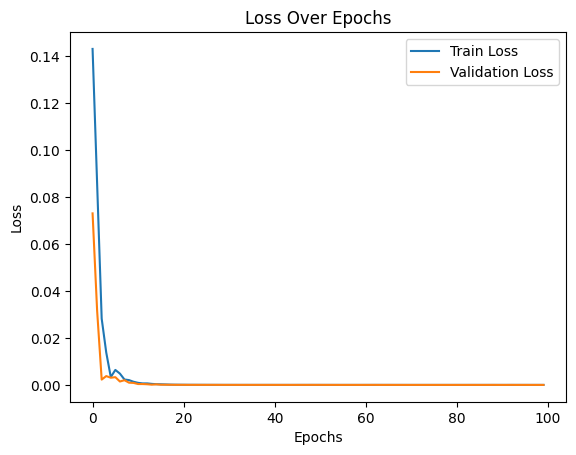

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.4506e-05
Mean Squared Error on Test Data: 2.450588181091007e-05
Custom Accuracy with 10% threshold: 40.04%


In [23]:
input_shape_lc = (X_lc_train.shape[1], 1)  # (timesteps, features)

# Reshape the input data for LSTM (LSTM expects 3D input: [samples, timesteps, features])
X_lc_train = X_lc_train.reshape((X_lc_train.shape[0], X_lc_train.shape[1], 1))
X_lc_test = X_lc_test.reshape((X_lc_test.shape[0], X_lc_test.shape[1], 1))

# Create the LSTM model
model_lc = create_lstm_model(input_shape_lc)

# Train the model and store the history
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model_lc.fit(X_lc_train, y_lc_train, epochs=100, batch_size=32, validation_data=(X_lc_test, y_lc_test), callbacks=[early_stopping])

# Plot the training loss and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predictions on test data
y_pred_lc = model_lc.predict(X_lc_test)

# Evaluate the model (mean squared error or other metrics can be used)
mse = model_lc.evaluate(X_lc_test, y_lc_test)
print(f'Mean Squared Error on Test Data: {mse}')

def accuracy_metric(y_true, y_pred, threshold=0.05):
    return np.mean(np.abs(y_true - y_pred) < threshold)

# Assuming y_lc_test and y_pred are already scaled, calculate accuracy within a 5% threshold
accuracy = accuracy_metric(y_lc_test, y_pred_lc, threshold=0.10)  # 10% threshold
print(f'Custom Accuracy with 10% threshold: {accuracy * 100:.2f}%')

In [24]:
def predict_next_cycle(model, user_input_data, scaler, num_features=45):

    # Creating a dummy array
    full_input_array = np.full((num_features,), np.mean(user_input_data))

    # Fill the known cycle length values at the start of the array
    full_input_array[:len(user_input_data)] = user_input_data

    # Scale the full input array using the same scaler
    full_input_array_scaled = scaler.transform(full_input_array.reshape(1, -1))

    # Reshape for LSTM input
    user_input_data_scaled = full_input_array_scaled.reshape((1, num_features, 1))  # 1 sample, timesteps, 1 feature

    # Predict the next cycle length (scaled)
    predicted_scaled = model.predict(user_input_data_scaled)

    # Unscale only the relevant cycle feature (assuming the prediction corresponds to the cycle length)
    cycle_length_column_index = 0  # Assuming the first column corresponds to the cycle length
    predicted_unscaled = (predicted_scaled * (scaler.data_max_[cycle_length_column_index] - scaler.data_min_[cycle_length_column_index])
                          + scaler.data_min_[cycle_length_column_index])

    return predicted_unscaled.flatten()[0]


# Example usage:

# Assume you have the following user input data (previous cycle lengths)
user_input_data = [29, 30, 28, 31]  # Replace this with actual user input

# Make the prediction
predicted_next_cycle_length = predict_next_cycle(model_lc, user_input_data, cycle_length_scaler)

# Output the predicted cycle length
print(f"Predicted next cycle length: {predicted_next_cycle_length}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted next cycle length: 32.24689483642578


In [28]:
model_lc.save('../model/model_lc.keras')